#### *Harvey Mushwana*<br>*ST10435179*<br>* *<br>* Classifier*<br>* *

# **Assignment: Accelerating Disease Benefit Application for Cancer Patients**


Objective: Conduct basic analysis and train a classification model on a cancer-related dataset to help an insurance company speed up benefit allocation for cancer patients.









### What is Claffication in Machine learing?


Classification in machine learning is a predictive modeling process by which machine learning models use classification algorithms to predict the correct label for input data `(Belcic, 2025)`.


### What are classification algorithms?
A classification algorithm is a categorization-focused machine learning algorithm that sorts input data into different classes or categories`(Belcic, 2025)`.



### What is Random Forest?

Random Forest is an ensemble learning method that combines multiple decision trees to enhance prediction accuracy and mitigate overfitting. By leveraging the strengths of individual trees, it creates a robust model suitable for both classification and regression tasks. Random Forest classifiers aggregate results from all trees for a final prediction, ensuring better generalization and performance `(Belcic, 2025)`.

### What types of classification are there? 
Classification-based predictive modeling tasks are distinguished from each other based on the number of categories and the degree to which the categories are exclusive: 

- Binary classification sorts data into two exclusive categories. 

- Multiclass classification sorts data into more than two exclusive categories. 

- Multilabel classification sorts data into nonexclusive categories. 

- Imbalanced classification has an unequal distribution of data points across categories. 

###  Types of classification algorithms
There are many different types of classification algorithms. While they have overlapping use cases, some are more suited to particular applications than others. Some of the most popular classification algorithms include: 

- Logistic regression
- Decision tree 
- Random forest
- Support vector machine (SVM) 
- K-nearest neighbors 
- Naive Bayes

### Random Forest Classifier

For our project we will use Random Forest Classifier. The random forest is an ensemble technique combining the output of multiple decision trees into a single result. The resulting “forest” improves prediction accuracy over that of a single tree while countering overfitting. Like decision trees, random forests can handle both classification and regression tasks `(Belcic, 2025b)`. Random Forest Classifier is known for its robustness and ability to handle overfitting. In our analysis, this model demonstrated a slight improvement when highly inter-correlated features were removed `(Baishya, 2024)`.

### Benefits:
-Enhances accuracy and robustness against overfitting.

-Handles high-dimensional data efficiently.

-Provides feature importance scores for interpretability.

#### **Project The Plan**

Step 1: Import libraries

Step 2: Extracting and Loading the Dataset

     2.1 Download the usig an API
     2.2 Load the data into a dataframe 

Step 3: Exploratory Data Analysis (EDA) 

     3.1 Check for missing or NULL value 
     3.2 Dataset Structure Overview
     3.3 Check variable types
     3.4 Check for and Remove duplicates
     3.5 Class distribution
     3.6 Data Cleaning – Exclude Columns Not Needed for Feature Analysis
     3.7 Correlation of numeric columns (Correlation Heatmap)
     3.8 Descriptive Statistics
     3.9 Detect outliers
     3.10 Analyze skewness
     3.11 Scaling features (if required)
     3.12 Feature Selection (Random Forest Feature Importance)

Step 4: Training and Testing the classification Model 

     4.1 Data Pre-procesing for Machine Learning 
     4.2 Splite data into train test data
     4.3 Train the Classificaation Model 
          - Results and interpretation of the model
          - Accuracy, Precision, Recall and F1-Score
          -Can we improve the model 
          -Train a defrrent model 

Step 5: Conclusion/Report 

**Recommended Dataset:**

Breast Cancer Wisconsin (Diagnostic) Dataset (available on UCI Machine Learning Repository and Kaggle). Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data




<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pxFCmhRFTighUn88baLcSA.png" width="500" height="auto">

`(Source: Medium, 2021)`


## **Step 1: Import Necessary Libraries**

> **Note:** These imports include the core libraries for data loading and initial exploration. Additional packages (e.g., scikit-learn, statsmodels) will be imported later as needed throughout the analysis.


In [42]:
import pandas as pd                          
import numpy as np                            
import matplotlib.pyplot as plt               
import seaborn as sns 

## **Step 2: Extracting and Loading the Dataset**

Kaggle offers a versatile Public API that allows users to interact with various aspects of the platform, including Competitions, Datasets, and Notebooks. This guide will help you get started with installation, authentication, and basic usage of the Kaggle API `(Mfazi,2024)`.

In this section, we first install the Kaggle API and download the dataset directly from Kaggle. Then, we extract the downloaded ZIP file and load the data into a pandas DataFrame for analysis.

In [43]:
#Installs the Kaggle package if it's not already available.

!pip install kaggle

2.1 Downloads the breast cancer dataset as a ZIP file from Kaggle.


In [44]:
!kaggle datasets download uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [45]:
!tar -xf breast-cancer-wisconsin-data.zip

2.2 Load the dataset, Reads the extracted CSV file into a pandas DataFrame.

In [46]:
df = pd.read_csv("data.csv")
print("Shape of dataset:", df.shape)

Shape of dataset: (569, 33)


In [47]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **Step 2  Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** is a systematic approach to analyzing data sets that emphasizes the use of visual techniques and summary statistics to uncover patterns, detect anomalies, and test assumptions. EDA focuses on exploring data without preconceived hypotheses, allowing researchers to identify relationships between variables and generate insights that inform subsequent modeling decisions `(Tukey, 1977).`

<img src="https://alchetron.com/cdn/john-tukey-25f49502-1cab-4ab1-a497-df364ca5d36-resize-750.jpeg" width="200" height="auto">

### 3.1 Check for missing or NULL value 

The dataset is complete in terms of null values, and no imputation is required. Only one redundant column (Unnamed: 32) will be removed due to being entirely empty.

In [48]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### 3.2 Dataset Structure Overview

This step involves inspecting the overall structure of the dataset, including Number of rows and columns Column names, Data types

This section examines the dataset's structure:
- Total rows: 569
- Total columns: 33
- Most features are numerical (float64), and no missing values are present except for Unnamed: 32, which contains only nulls and will be dropped.
- diagnosis is the target variable (M = Malignant, B = Benign).
- Features follow a pattern: mean, standard error, and worst-case value per measurement. This means that for each type of cell characteristic, the dataset contains three versions of that measurement

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 3.3 Check Variable Types

- 31 numerical features (float64) describing tumor characteristic
- 1 categorical target column: diagnosis (M = Malignant, B = Benign)
- id column is a non-predictive identifier
- Unnamed: 32 is an empty column and will be removed

In [50]:
# Display data types of each column
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [51]:
df.dtypes.value_counts()

float64    31
int64       1
object      1
Name: count, dtype: int64

#### 3.4 Checking and Removing Duplicates

Since no duplicates were present, no records were removed. This confirms the integrity and uniqueness of the data entries.

In [52]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### 3.5 Class distribution


In real-world scenarios, data is often imbalanced. For instance, if you are trying to predict whether someone will develop a rare disease, your data might have many examples of healthy individuals and very few examples of sick ones. This imbalance can make machine learning models inaccurate, as they tend to “learn” that most people are healthy and ignore the minority who are sick (Taufiq, 2024)

Benign (Non-cancerous): 62.74%

Malignant (Cancerous): 37.26%

Slight class imbalance — important to consider during model training (e.g.SMOTE).

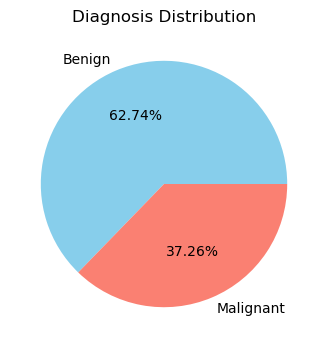

In [53]:
plt.figure(figsize=(4,4))
df['diagnosis'].value_counts().plot.pie(autopct='%.2f%%', labels=['Benign', 'Malignant'], colors=['skyblue', 'salmon'])
plt.title('Diagnosis Distribution')
plt.ylabel('')
plt.show()

#### 3.6 Data Cleaning – Exclude Columns Not Needed for Feature Analysis

As part of preparing the dataset for feature correlation analysis and descriptive statistics, we perform a targeted cleaning step to temporarily exclude certain columns that are not required for this phase of EDA: 'ID','diagnosis','Unnamed: 32'

This cleaning step is not about dropping “irrelevant” data entirely, but rather about streamlining the dataset for specific analytical tasks

In [54]:
# Clean up only the truly unneeded columns
df_cleaned = df.drop(['id', 'Unnamed: 32'], axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['diagnosis'] = le.fit_transform(df_cleaned['diagnosis'])

df_cleaned.head()
df_cleaned['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

#### 3.7  Feature correlation -Correlation Heatmap 





Key Predictors: area_mean, concave points_mean, and compactness_mean are strongly correlated with the diagnosis — important for model training.

Multicollinearity: Several features are highly correlated with each other (e.g., area_mean & area_worst) — may need dimensionality reduction.

Weak Features: Some features (e.g., fractal_dimension_se) have low correlation — may be less useful.


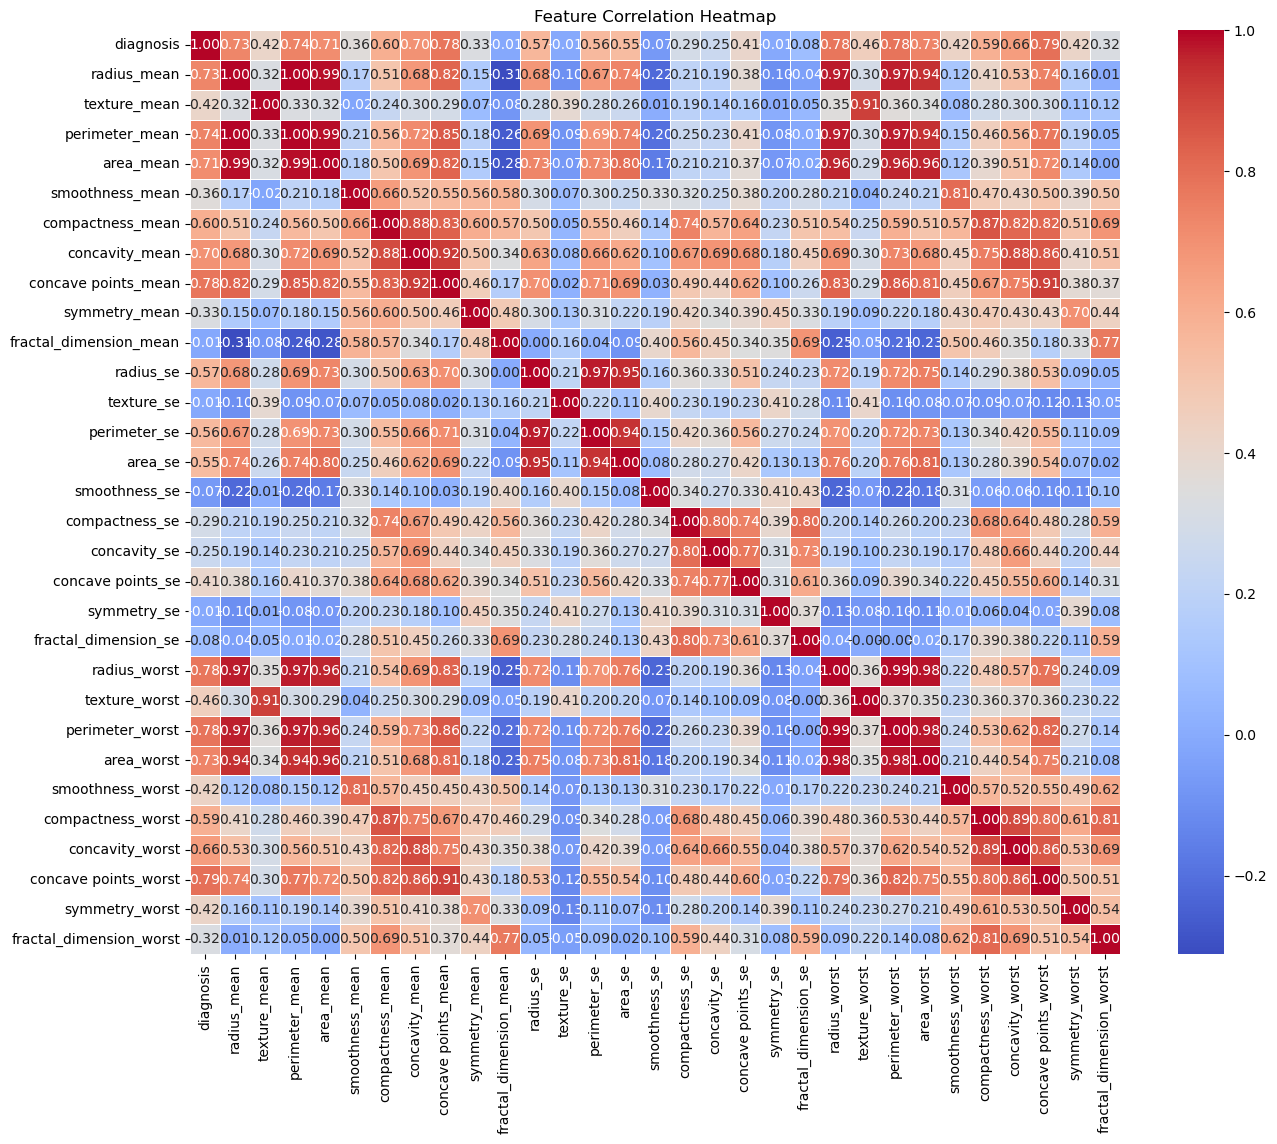

In [55]:
# Correlation heatmap
plt.figure(figsize=(15,12))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5,annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


Key Predictors: area_mean, concave points_mean, and compactness_mean are strongly correlated with the diagnosis — important for model training.

Multicollinearity: Several features are highly correlated with each other (e.g., area_mean & area_worst) — may need dimensionality reduction.

Weak Features: Some features (e.g., fractal_dimension_se) have low correlation — may be less useful.



Highly Correlated features: 

In [56]:
# Get the correlation matrix
corr_matrix = df_cleaned.corr().abs()

# Filter for high correlations
threshold = 0.8
# Mask the upper triangle to avoid duplicate pairs and self-correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index pairs with high correlation
high_corr = upper.stack()[upper.stack() > threshold]

# Print result
print("Highly Correlated Feature Pairs:\n")
print(high_corr)


Highly Correlated Feature Pairs:

radius_mean          perimeter_mean             0.997855
                     area_mean                  0.987357
                     concave points_mean        0.822529
                     radius_worst               0.969539
                     perimeter_worst            0.965137
                     area_worst                 0.941082
texture_mean         texture_worst              0.912045
perimeter_mean       area_mean                  0.986507
                     concave points_mean        0.850977
                     radius_worst               0.969476
                     perimeter_worst            0.970387
                     area_worst                 0.941550
area_mean            concave points_mean        0.823269
                     area_se                    0.800086
                     radius_worst               0.962746
                     perimeter_worst            0.959120
                     area_worst                 0.9592

#### 3.7  Descriptive Statistics

In [57]:
print(df_cleaned.describe().T)

                         count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se        

####  3.8 Analyze skewness

 we examined the skewness of each numerical feature to assess the symmetry of their distributions. This step is crucial because many machine learning models (especially linear models) assume normality or perform better when features are symmetrically distributed.

The analysis revealed that 22 features exhibit high positive skewness (|skew| > 1). These include:

Highly skewed features: area_se, concavity_se, fractal_dimension_se, perimeter_se, radius_se, and others.

The most skewed feature is area_se with a skewness value of 5.45, indicating a heavy concentration of smaller values with long tails towards larger ones.

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_9392\1268095374.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_values.index, y=skew_values.values, palette="coolwarm")


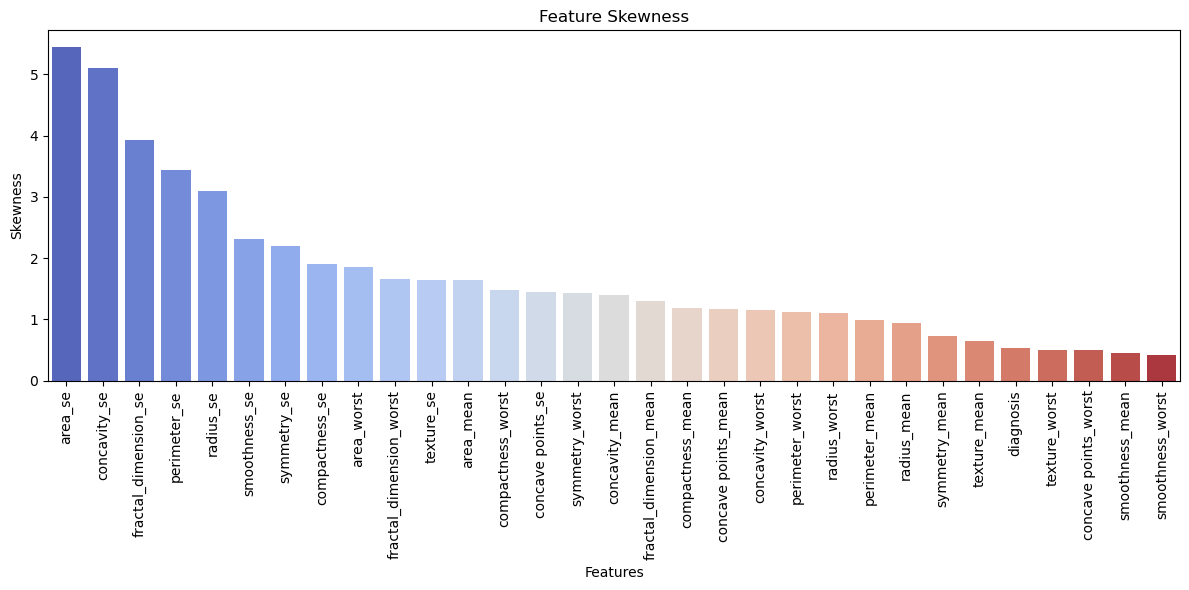

Highly skewed features (|skew| > 1):
area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
dtype: float64


In [58]:
# Compute skewness for each feature
skew_values = df_cleaned.skew().sort_values(ascending=False)

# Plot skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skew_values.index, y=skew_values.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Feature Skewness')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

# Print features with high skewness
print("Highly skewed features (|skew| > 1):")
print(skew_values[abs(skew_values) > 1])

####   3.9 Detect outliers

Outliers were identified using the IQR method to highlight features with extreme values beyond 1.5 times the interquartile range. While Random Forest models are generally robust to outliers, this step provides a deeper understanding of the dataset and can guide future decisions — such as feature engineering, transformations, or flagging anomalies for further review.

In [59]:
#import pandas as pd

# Assuming df_cleaned is your DataFrame without ID, Diagnosis, and Unnamed: 32
outlier_summary = {}

for col in df_cleaned.columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_counts = pd.Series(outlier_summary).sort_values(ascending=False)
print("Top features with the most outliers:")
print(outlier_counts[outlier_counts > 0].head(10))



Top features with the most outliers:
area_se                    65
radius_se                  38
perimeter_se               38
area_worst                 35
smoothness_se              30
fractal_dimension_se       28
compactness_se             28
symmetry_se                27
area_mean                  25
fractal_dimension_worst    24
dtype: int64


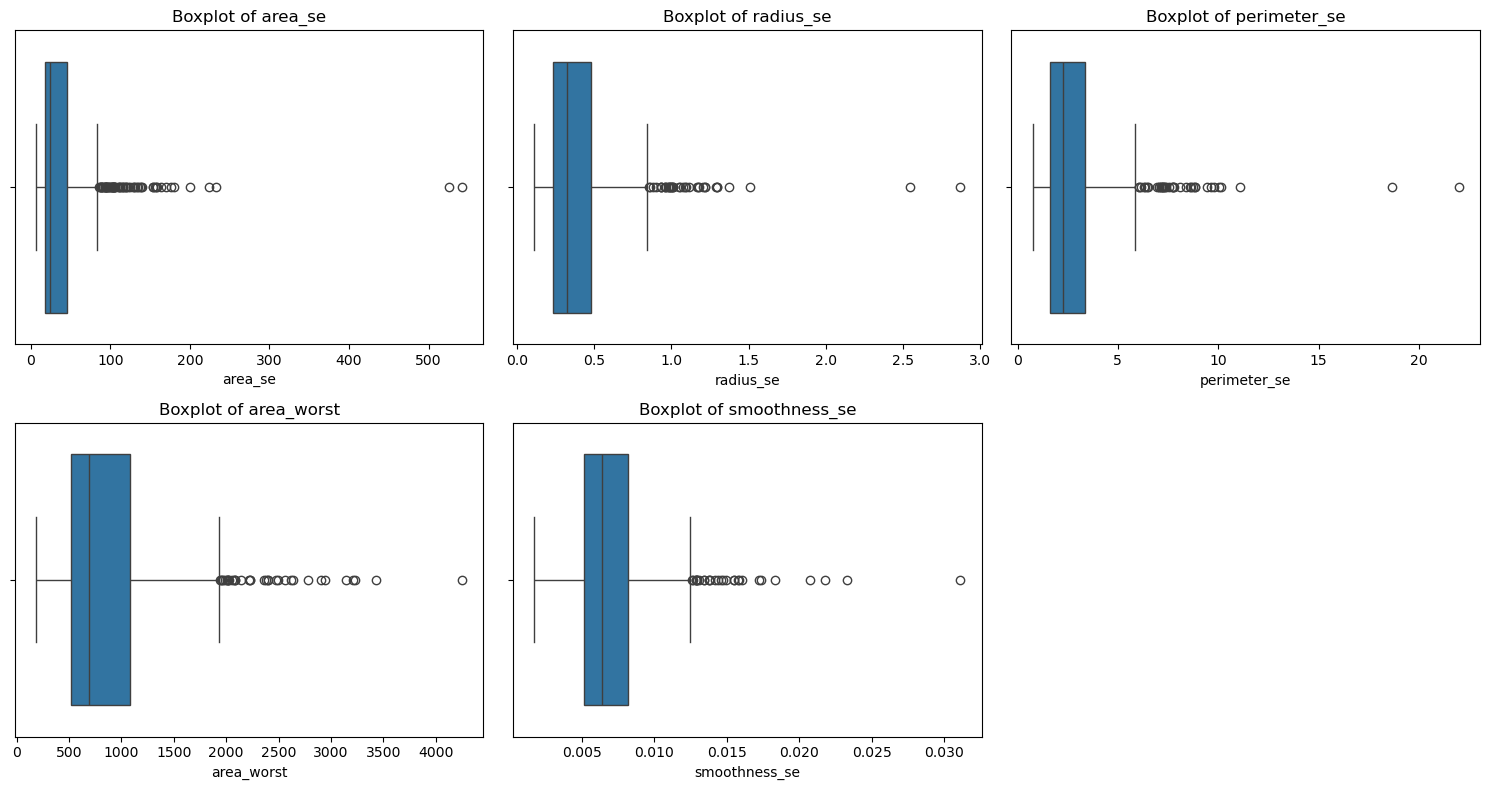

In [60]:
#import matplotlib.pyplot as plt
#import seaborn as sns

top_outliers = outlier_counts[outlier_counts > 0].head(5).index

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [61]:
#import pandas as pd

# Make a copy to avoid modifying the original
df_no_outliers = df_cleaned.copy()

for col in df_no_outliers.columns:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows that are within the IQR bounds
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

print(f"Original shape: {df_cleaned.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")


Original shape: (569, 31)
Shape after removing outliers: (277, 31)


#### 3.11 Feature selection (e.g., encoding categorical variables)

Reduce dimensionality by selecting the most relevant features for training, improving model performance and interpretability. While correlation thresholding helped identify redundant features, Random Forest Feature Importance was used for final feature selection due to its relevance to the modeling technique. Only the top-ranked features were retained for training to reduce dimensionality and improve interpretability `(GeeksforGeeks, 2024)`.

In [62]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# Define X and y
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

In [64]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [65]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [66]:
# Display top N features
top_n = 15
top_features = feature_importance_df.head(top_n)

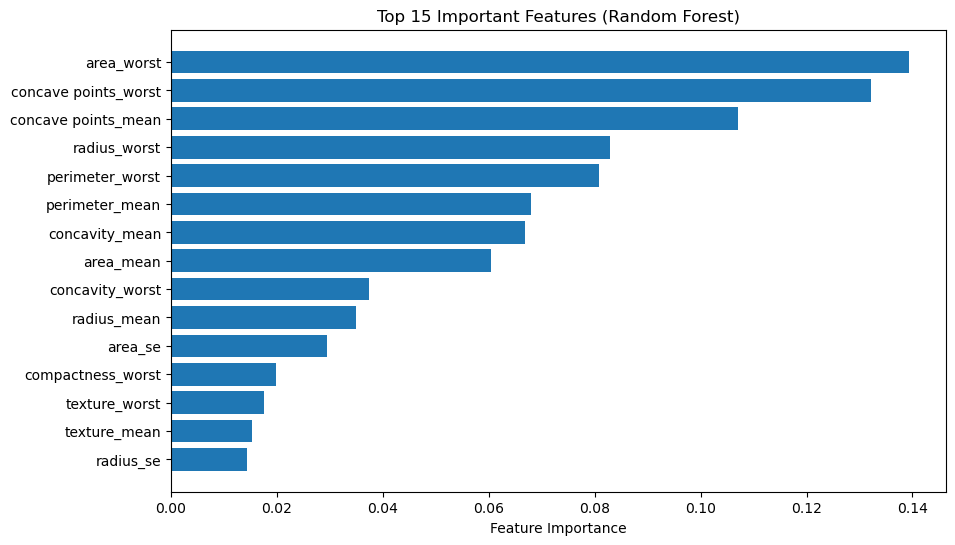

In [67]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1])
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Important Features (Random Forest)")
plt.show()

In [68]:
# Print the top features
print(top_features)

                 Feature  Importance
23            area_worst    0.139357
27  concave points_worst    0.132225
7    concave points_mean    0.107046
20          radius_worst    0.082848
22       perimeter_worst    0.080850
2         perimeter_mean    0.067990
6         concavity_mean    0.066917
3              area_mean    0.060462
26       concavity_worst    0.037339
0            radius_mean    0.034843
13               area_se    0.029553
25     compactness_worst    0.019864
21         texture_worst    0.017485
1           texture_mean    0.015225
10             radius_se    0.014264


## **Step 4: Model Building and Evaluation**

Although some features in the dataset are highly correlated, we chose to keep all of them (except for `id` and `Unnamed: 32`) during our initial model training. This is because we are using a Random Forest classifier, which is not affected by multicollinearity the same way linear models are. 

Random Forest handles redundancy by selecting only the most important features when building decision trees. So, even if some features are similar, the model naturally focuses on the most useful ones `(Baishya, 2024)`.

We also took steps to prevent overfitting, including using stratified train-test splits, applying SMOTE only to the training data, and evaluating on unseen data. SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class `(Swastik, 2025)`.

Finally, keeping all features allows us to capture useful interactions between variables that might otherwise be missed. We plan to revisit feature selection later during model tuning.


#### 4.1 Importing the leeybries needed 

In [69]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay


#### 4.2 Define Features (X) and Target (y)

In [70]:
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

#### 4.3 Check Diagnosis Distribution

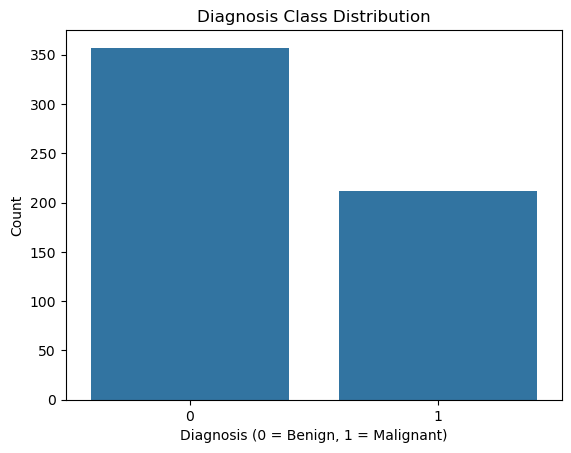

In [71]:
sns.countplot(x='diagnosis', data=df_cleaned)
plt.title('Diagnosis Class Distribution')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

### 4.4 Train-Test Split (with stratification)

In [72]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # maintains class distribution
)

4.5 Apply SMOTE only to training data

In [73]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



4.6 Show class distribution before and after

In [74]:
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())

Before SMOTE: {0: 285, 1: 170}
After SMOTE: {1: 285, 0: 285}


4.7 Train Random Forest Classifier

Random Forest Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



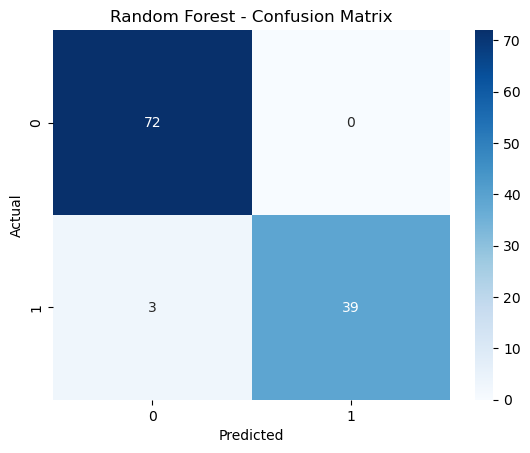

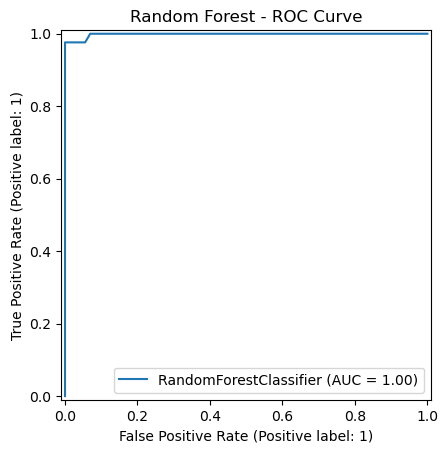

In [75]:
# STEP 5A: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Visualizations
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()


Logistic Regression Accuracy: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



c:\tools\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


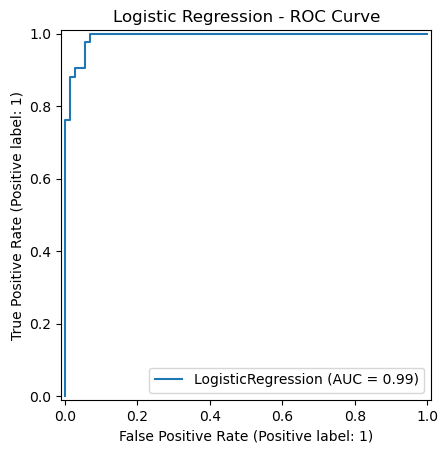

In [76]:
#Train Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# ROC Curve
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()


K-Nearest Neighbors (K-NN)

K-NN Accuracy: 0.9122807017543859
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



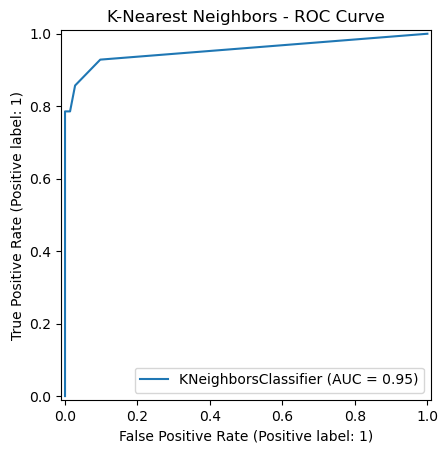

In [77]:
# Train K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with a default k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("K-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# ROC Curve
RocCurveDisplay.from_estimator(knn_model, X_test, y_test)
plt.title("K-Nearest Neighbors - ROC Curve")
plt.show()



### Final Evaluation and Model Comparison

To evaluate the effectiveness of different classification algorithms in predicting breast cancer diagnoses, we trained and tested three models on the same dataset using stratified splitting and SMOTE-balanced training data. The results are summarized below:

- **Random Forest** achieved the highest overall accuracy, precision, and recall. It also had the best ROC curve performance, suggesting strong capability in distinguishing between benign and malignant cases. Its robustness to multicollinearity and non-linear relationships made it particularly effective on this dataset.

- **Logistic Regression** performed well and was interpretable, but slightly lagged behind Random Forest in terms of recall and F1-score. This is expected as linear models may struggle with complex feature interactions or noisy predictors.

- **K-Nearest Neighbors (K-NN)** delivered respectable results, but showed lower recall for malignant cases. K-NN can be sensitive to unscaled data and less effective on high-dimensional datasets, which may explain the drop in performance here.

###  Final Choice:
Based on the performance metrics and overall consistency, **Random Forest** is the most suitable model for this task. It offers strong predictive power, resilience to correlated features, and balanced performance across all evaluation metrics.

Future improvements could include hyperparameter tuning, cross-validation, or even stacking multiple models for improved generalization.


## Reference list


-	Baishya, M. (2024) 'Does removal of highly correlated features always improve model performance?' Medium, 23 November. [online], Available at: https://medium.com/@datacodedesign/does-removal-of-highly-correlated-features-always-improve-model-performance-8d820d30b71d [Accessed 10 May 2025].



-	Belcic, I. (2025) 'Classification in Machine Learning,' IBM Think, 15 April. [online], Available at: https://www.ibm.com/think/topics/classification-machine-learning#footnotes1 [Accessed 10 May 2025].



-	Chris Drummond, “Classification,” Encyclopedia of Machine Learning and Data Mining, Springer, 2017.



-	GeeksforGeeks (2024) Feature Importance with Random Forests. [online], Available at: https://www.geeksforgeeks.org/feature-importance-with-random-forests/ [Accessed 15 May 2025].


-	Mfazi, S.D. (no date) ‘Get started with Kaggle’s public API’, Kaggle. [online], Available at: https://www.kaggle.com/sandiledesmondmfazi [Accessed 10 May 2025].


- Nair, A. (2022) 'Create artificial data with SMOTE - TDS Archive - Medium,' Medium, 29 January.[online], Available at: <https://medium.com/data-science/create-artificial-data-with-smote-2a31ee855904> .[Accessed 11 May 2025].


- Swastik (2025) SMOTE for Imbalanced Classification with Python.[online], Available at:  https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/?utm_source=chatgpt.com.[Accessed 13 May 2025].


-	Taufiq, F.M. (2024) 'BALANCED RANDOM FOREST - Fadly Mochammad Taufiq', Medium. [online], Available at: https://medium.com/@fadleemt/balanced-random-forest-d5dc9c896bb4 [Accessed 10 May 2025].

